# Loan Prediction, A Classification Problem

-  The dataset has 13 columns and 614 rows
-  The dataset has no duplicates 
-  The dataset has 149 `na` values 
-  The column `Loan_ID` is not required for our purpose
-  It is a binary classification problem - whether loan can be given or not


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("C:/Users/srini/OneDrive/Desktop/Loan_Prediction/Data/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)

Shape of dataset: (614, 13)

Column Names:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


## Remove Columns which are not required 

In [8]:
# remove loan id column which is not required
df.drop("Loan_ID", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Check Duplicates 


In [9]:
df.duplicated().sum()

0

## Check `nas` of all columns 

In [10]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handle missing values

In [11]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", numeric_features)
print("Categorical columns:", categorical_features)

Numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [12]:
# Fill categorical with mode
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical with median
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)


In [13]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Add new feature `Total_Income`

In [14]:
# get new feature named total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [16]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

## Drop the original income columns

In [17]:
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

## Check unique values of category columns to regularize values like `3+` 


In [18]:
for column in categorical_features:
    unique_values = df[column].unique()
    print( f'Column name: {column} - Unique values: {unique_values}' )


Column name: Gender - Unique values: ['Male' 'Female']
Column name: Married - Unique values: ['No' 'Yes']
Column name: Dependents - Unique values: ['0' '1' '2' '3+']
Column name: Education - Unique values: ['Graduate' 'Not Graduate']
Column name: Self_Employed - Unique values: ['No' 'Yes']
Column name: Property_Area - Unique values: ['Urban' 'Rural' 'Semiurban']
Column name: Loan_Status - Unique values: ['Y' 'N']


In [19]:
# regularize values in Dependents column 
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].unique()

array([0, 1, 2, 3])

In [20]:
#reassign the categorical features and numeric features after creating new feature and removing old features
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", numeric_features)
print("Categorical columns:", categorical_features)

Numeric columns: Index(['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome'],
      dtype='object')
Categorical columns: Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  TotalIncome       614 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 50.5+ KB


## Encode categorical data 


In [22]:
categorical_features

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [23]:
# Encode Binary Columns

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


# One-Hot Encode Nominal Column

df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# Final Check

print(df.head())
print("\nData Types:\n", df.dtypes)

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
0       1        0           0          1              0       128.0   
1       1        1           1          1              0       128.0   
2       1        1           0          1              1        66.0   
3       1        1           0          0              0       120.0   
4       1        0           0          1              0       141.0   

   Loan_Amount_Term  Credit_History  Loan_Status  TotalIncome  \
0             360.0             1.0            1       5849.0   
1             360.0             1.0            0       6091.0   
2             360.0             1.0            1       3000.0   
3             360.0             1.0            1       4941.0   
4             360.0             1.0            1       6000.0   

   Property_Area_Semiurban  Property_Area_Urban  
0                    False                 True  
1                    False                False  
2                    False

In [24]:
dummy_cols = ['Property_Area_Semiurban', 'Property_Area_Urban']

for col in dummy_cols:
    df[col] = df[col].astype(int)
print("\nData Types after conversion:\n", df.dtypes)


Data Types after conversion:
 Gender                       int64
Married                      int64
Dependents                   int32
Education                    int64
Self_Employed                int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
Property_Area_Semiurban      int32
Property_Area_Urban          int32
dtype: object


## Check Target Balance

In [25]:
df['Loan_Status'].value_counts()
df['Loan_Status'].value_counts(normalize=True)
df.describe()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,145.752443,342.410423,0.855049,0.687296,7024.705081,0.379479,0.328990
std,0.386497,0.476373,1.009623,0.413389,0.340446,84.107233,64.428629,0.352339,0.463973,6458.663872,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,128.000000,360.000000,1.000000,1.000000,5416.500000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,164.750000,360.000000,1.000000,1.000000,7521.750000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,1.000000,81000.000000,1.000000,1.000000


## Check skewness of total income

In [26]:
df[['LoanAmount', 'TotalIncome']].describe()

,LoanAmount,TotalIncome
count,614.000000,614.000000
mean,145.752443,7024.705081
std,84.107233,6458.663872
min,9.000000,1442.000000
25%,100.250000,4166.000000
50%,128.000000,5416.500000
75%,164.750000,7521.750000
max,700.000000,81000.000000


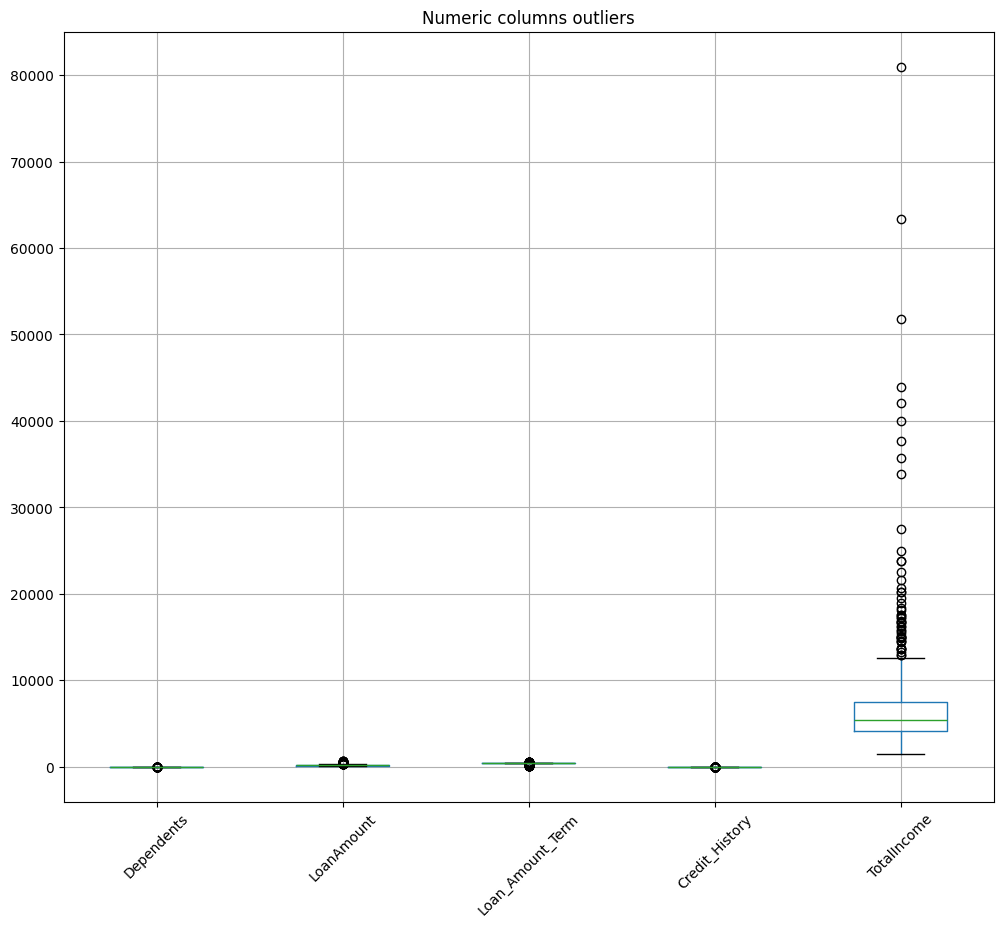

In [27]:
# preview outliers with boxplot
# check and exclude outliers from numeric columns

plt.figure(figsize=(12,10))

df[numeric_features].boxplot()

plt.xticks(rotation=45)

plt.title('Numeric columns outliers')
plt.show()


## Log Transform TotalIncome

In [28]:
df['TotalIncome'] = np.log1p(df['TotalIncome'])

In [29]:
df['TotalIncome'].describe()


count    614.000000
mean       8.669608
std        0.545017
min        7.274480
25%        8.334952
50%        8.597390
75%        8.925682
max       11.302217
Name: TotalIncome, dtype: float64

## Handle data for prediction


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (491, 11)
Test shape: (123, 11)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

print("Scaling complete.")


Scaling complete.


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

print("Model trained successfully.")


Model trained successfully.


In [33]:
y_pred = model.predict(X_test_scaled)


In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8536585365853658


In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[21 17]
 [ 1 84]]


In [36]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



## K-Nearest Neighbors (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.8211382113821138


## SVM

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.8536585365853658


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)   # Using unscaled data

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8455284552845529


## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", gb_acc)


Gradient Boosting Accuracy: 0.8373983739837398


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.7073170731707317


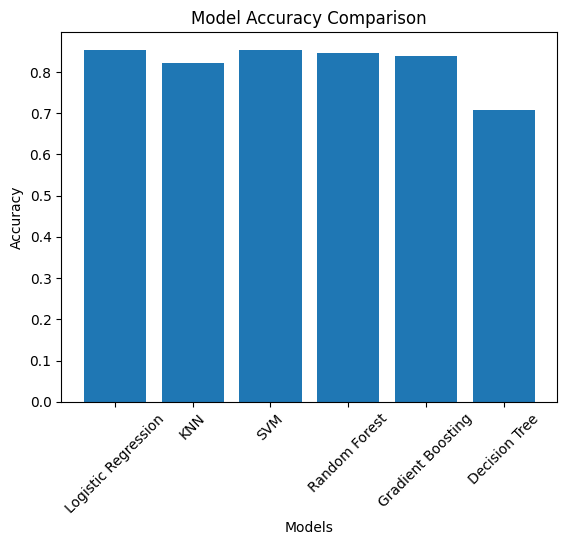

In [42]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 
          'Gradient Boosting', 'Decision Tree']

accuracies = [
    accuracy,      # Logistic (already computed earlier)
    knn_acc,
    svm_acc,
    rf_acc,
    gb_acc,
    dt_acc
]

plt.figure()
plt.bar(models, accuracies)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


In [43]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies
})

print(comparison_df.sort_values(by="Accuracy", ascending=False))


                 Model  Accuracy
0  Logistic Regression  0.853659
2                  SVM  0.853659
3        Random Forest  0.845528
4    Gradient Boosting  0.837398
1                  KNN  0.821138
5        Decision Tree  0.707317
